In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the data into the coding enviroment
Data = pd.read_csv("D:/IMT/3- Data Science/5- Project #1/EnglandWeather.csv")
Data = pd.DataFrame(Data) # DataFrame with all the columns
Data

# if we wanted to keep some of columns, then we would have:
#Data = pd.DataFrame (Data, columns=["Formatted Date", "Summary", "Precip Type", "Temperature (C)", "Wind Speed (km/h)", "Pressure (millibars)", "Humidity"])

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


In [4]:
# trying to work with the 1st column which is time serie and spliting it.
# we don't want the 2nd (00:00:00.000) and 3rd (+0200) part of the 1st column, here is the process:
# two spaces are considered

new = Data["Formatted Date"].str.split(" ", n = 2, expand=True)
new

,0,1,2
0,2006-04-01,00:00:00.000,+0200
1,2006-04-01,01:00:00.000,+0200
2,2006-04-01,02:00:00.000,+0200
3,2006-04-01,03:00:00.000,+0200
4,2006-04-01,04:00:00.000,+0200
...,...,...,...
96448,2016-09-09,19:00:00.000,+0200
96449,2016-09-09,20:00:00.000,+0200
96450,2016-09-09,21:00:00.000,+0200
96451,2016-09-09,22:00:00.000,+0200


In [5]:
# removing the 1st column from the read dataset

Data1 = Data.drop(columns=["Formatted Date"])
Data1

,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


In [6]:
# now inserting the part that we want to be replaced instead of the "Formatted Date" column that we used to have

Data1.insert(0, "Date", new[0], True) # inplace=True
Data1

# here you can see that columns look fine!

,Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


In [7]:
# we have 24 ~ 23 rows per day, let's do something about it.
# first of all, sort the rows by the values of the "Date" column

# sorting the values inside the "Date" column
DataFrame = Data1.sort_values(by="Date")

# mean implementing of the 23~24 values of each day into only 1 value
DataMean = DataFrame.groupby(pd.Grouper(key="Date"), as_index=False).mean()
DataMean

# as you can see there are only the numeric columns left.
# the alphabetical columns were removed {"Summary" & "Precip Type"}

C:\Users\Samira\AppData\Local\Temp\ipykernel_12304\3008579948.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DataMean = DataFrame.groupby(pd.Grouper(key="Date"), as_index=False).mean()


,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-01-01,3.873148,21.372750,1012.279167,0.818333
1,2006-01-02,5.418519,17.551683,1010.131667,0.844583
2,2006-01-03,2.319444,8.417617,1020.805000,0.898333
3,2006-01-04,2.274074,11.579925,981.826667,0.905417
4,2006-01-05,2.698148,9.515100,935.988333,0.948333
...,...,...,...,...,...
4013,2016-12-27,0.280324,10.980200,1020.304583,0.890000
4014,2016-12-28,0.224306,10.969467,1020.334583,0.890000
4015,2016-12-29,0.169676,10.892992,1020.365833,0.889583
4016,2016-12-30,0.119444,10.806454,1020.395000,0.889167


In [9]:
# here you can save this processed dataset that we achieved:
DataMean.to_csv('D:/IMT/3- Data Science/12- Project #1 answer/USEABLE_EnglandWeather.csv')

Now let's begine the dataset analyzing.

Our **target** for this dataset is to calculate the amount of **Humidity**.

In this dataset, 4 the columns seem to be important and related to **Humidity**, so they are kept in DataFrame (DataMean) as mentioned below.

In [10]:
DataMean.describe() # describe in the numeric way of the numeric columns

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,4018.000000,4018.000000,4018.000000,4018.000000
mean,11.930135,10.812832,1003.233274,0.734882
std,8.778866,5.003314,71.325790,0.134333
min,-15.773611,1.245067,327.756800,0.297917
25%,5.046123,7.176575,1010.859167,0.632500
50%,12.245833,9.950806,1015.985208,0.743333
75%,19.269850,13.345894,1020.551979,0.842500
max,30.531481,36.002954,1043.574167,0.995000


As you can see, there is no **Missing Value** in the *non-alphabetic* or *numeric* columns of the DataFrame!<br>
Mean *Temperature (C)*, *Wind Speed (km/h)*, *Pressure (millibars)* and *Humidity* are so.. (you can have some description about them)

And the rest of the non-numeric or alphabetic columns are described as follows;

In [14]:
# NOT IMPORTANT ***
Data.describe(include=object) # describe in the alphabetic way of the verbal columns

,Formatted Date,Summary,Precip Type
count,96453,96453,95936
unique,96429,27,2
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain
freq,2,31733,85224


As you can see, there is **Missing Value**!!!<br>
The **Precip Type** column shows less value than all the other 6 columns! **96453 - 95936 = 517** null values are there..<br>
Description of this table is, the description of *Formatted Date*, *Summary*, and *Precip Type*.<br>
(you can have some description about them)

**Also, another thing that could be done was that if we saw that some of the columns of the dataset were not describe(), we would create a separate and NEW DataFrame with those columns completely SEPARATELY, then we would describe this newly created one.<br>
In this way, the columns that were not included in normal describe were described.**
<br>We can do this as follows:

In [15]:
# NOT IMPORTANT ***
df_not_described_before = pd.DataFrame (Data, columns=["Formatted Date", "Summary", "Precip Type"])
df_not_described_before

,Formatted Date,Summary,Precip Type
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain
...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain


In [16]:
# NOT IMPORTANT ***
df_not_described_before.describe()

,Formatted Date,Summary,Precip Type
count,96453,96453,95936
unique,96429,27,2
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain
freq,2,31733,85224


**As you could see, it did the same as the command "df.describe(include=object)".<br>
So, it is not really necessary to make a separate dataset, changing the content of the paranthesis seems enough.**

In [17]:
DataMean.mean(numeric_only=True) # np.mean(df) : this command has warnings

Temperature (C)           11.930135
Wind Speed (km/h)         10.812832
Pressure (millibars)    1003.233274
Humidity                   0.734882
dtype: float64

We can also calculate this but it's not that usefull. So, not important to be considered!

In [18]:
DataMean.var(numeric_only=True) # np.var(df) : this command has warnings

Temperature (C)           77.068481
Wind Speed (km/h)         25.033153
Pressure (millibars)    5087.368359
Humidity                   0.018045
dtype: float64

We can also calculate this, too. But it's not that usefull again. So, not important to be considered!

In [19]:
DataMean.shape # (rows, columns)

(4018, 5)

Now that we know that we have Missing Value problem and the x and y axis values were not equal to draw the plot, we should use the following command.

<br>**But this is not important, because we have our best DataFrame (DataMean) and it has no Missing Values!**
<br>**This Missing Value that we have down in here implemented, is related to the old uploaded version of dataset.**
<br>**The Mean implemented dataset (DataMean) doesn't have to have "dropna()". It already HAS IMPLEMENTED MEAN!**

In [21]:
DF = DataMean.dropna()
DF

,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-01-01,3.873148,21.372750,1012.279167,0.818333
1,2006-01-02,5.418519,17.551683,1010.131667,0.844583
2,2006-01-03,2.319444,8.417617,1020.805000,0.898333
3,2006-01-04,2.274074,11.579925,981.826667,0.905417
4,2006-01-05,2.698148,9.515100,935.988333,0.948333
...,...,...,...,...,...
4013,2016-12-27,0.280324,10.980200,1020.304583,0.890000
4014,2016-12-28,0.224306,10.969467,1020.334583,0.890000
4015,2016-12-29,0.169676,10.892992,1020.365833,0.889583
4016,2016-12-30,0.119444,10.806454,1020.395000,0.889167


In [22]:
DF.shape

(4018, 5)

Now as you've seen, no changes happened to the shape, because after implementing Mean, there would be no Missing Values left!

If we want to take two columns as an example together and compare them, we can:

In [23]:
DF1 = pd.DataFrame (DF, columns=["Temperature (C)", "Humidity"])
DF1

,Temperature (C),Humidity
0,3.873148,0.818333
1,5.418519,0.844583
2,2.319444,0.898333
3,2.274074,0.905417
4,2.698148,0.948333
...,...,...
4013,0.280324,0.890000
4014,0.224306,0.890000
4015,0.169676,0.889583
4016,0.119444,0.889167


In [24]:
DF2 = pd.DataFrame (DF, columns=["Wind Speed (km/h)", "Humidity"])
DF2

,Wind Speed (km/h),Humidity
0,21.372750,0.818333
1,17.551683,0.844583
2,8.417617,0.898333
3,11.579925,0.905417
4,9.515100,0.948333
...,...,...
4013,10.980200,0.890000
4014,10.969467,0.890000
4015,10.892992,0.889583
4016,10.806454,0.889167


In [25]:
DF3 = pd.DataFrame (DF, columns=["Pressure (millibars)", "Humidity"])
DF3

,Pressure (millibars),Humidity
0,1012.279167,0.818333
1,1010.131667,0.844583
2,1020.805000,0.898333
3,981.826667,0.905417
4,935.988333,0.948333
...,...,...
4013,1020.304583,0.890000
4014,1020.334583,0.890000
4015,1020.365833,0.889583
4016,1020.395000,0.889167


## Scatter Plots

Now we want to use plots to plot this dataset.

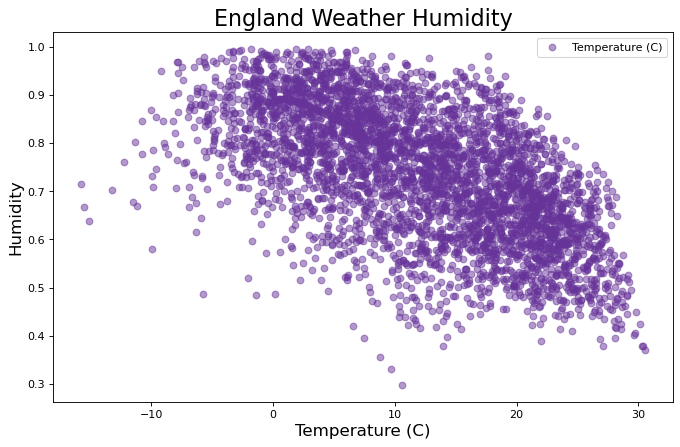

In [27]:
# PLOTTING DF1

plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.scatter(DF['Temperature (C)'], DF['Humidity'], c='rebeccapurple', alpha=0.5)

plt.legend (['Temperature (C)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Temperature (C)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels 
plt.ylabel('Humidity', fontsize=15)

#plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Scatter plots (NEW)/1-Temperature&Humidity.png')

plt.show()

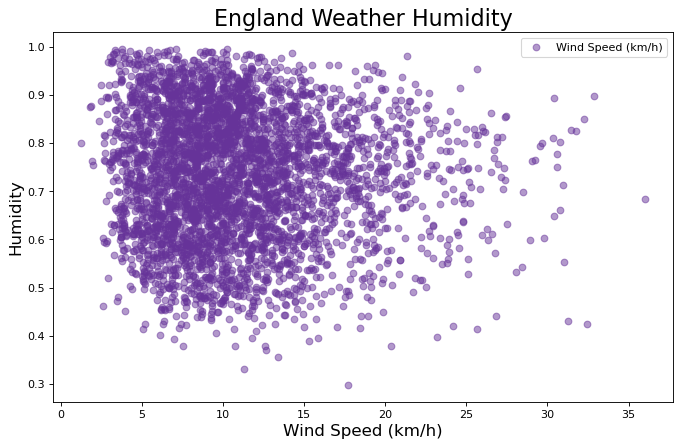

In [29]:
# PLOTTING DF2

plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.scatter(DF['Wind Speed (km/h)'], DF['Humidity'], c='rebeccapurple', alpha=0.5)

plt.legend (['Wind Speed (km/h)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Wind Speed (km/h)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels 
plt.ylabel('Humidity', fontsize=15)

#plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Scatter plots (NEW)/2-Wind_Speed&Humidity.png')

plt.show()

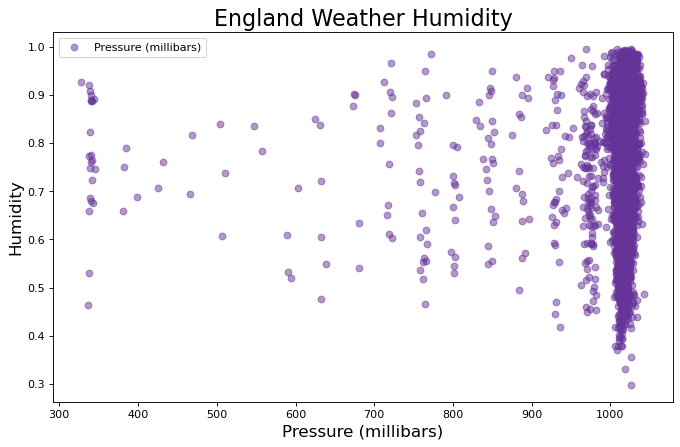

In [31]:
# PLOTTING DF3

plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.scatter(DF['Pressure (millibars)'], DF['Humidity'], c='rebeccapurple', alpha=0.5)

plt.legend (['Pressure (millibars)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Pressure (millibars)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels 
plt.ylabel('Humidity', fontsize=15)

#plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Scatter plots (NEW)/3-Pressure&Humidity.png')

plt.show()

## Overlap Scatter Plots

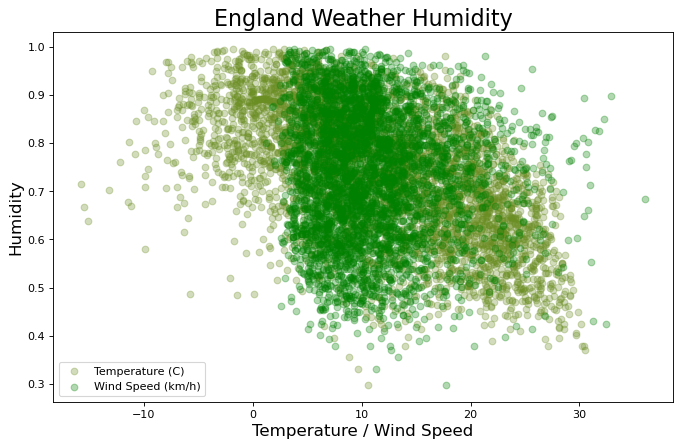

In [33]:
# SOME HOW DF2 ON DF1 PLOTTING

plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.scatter(DF['Temperature (C)'], DF['Humidity'], alpha=0.3, c='olivedrab')
plt.scatter(DF['Wind Speed (km/h)'], DF['Humidity'], alpha=0.3, c='green')

plt.legend (['Temperature (C)', 'Wind Speed (km/h)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Temperature / Wind Speed', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels 
plt.ylabel('Humidity', fontsize=15)

#plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Temperature&Wind_Speed&Humidity (new).png')

plt.show()

As we saw, none of the values of the axises needed to be sorted and all the numbers were in order on both axes, but if they needed to be sorted, we could use this command:

DF_sorted = DF_sorted.sort_values( by = [ 'Humidity' ] )

## Bar Plots

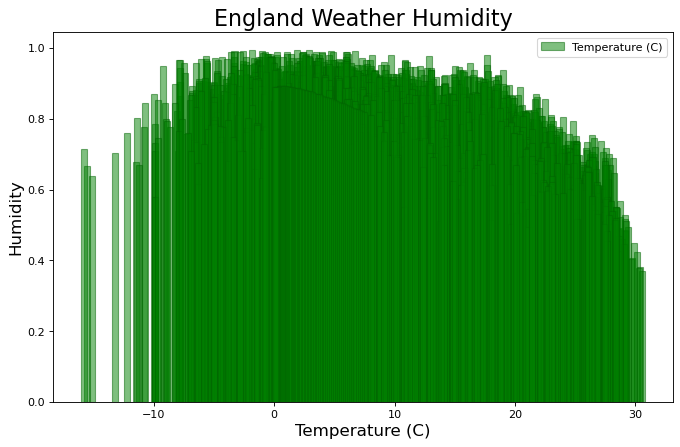

In [35]:
# PLOTTING DF1

plt.figure(figsize=(10, 6), dpi=80) #Mimize the plot

plt.bar(DF['Temperature (C)'], DF['Humidity'], width=0.5, color="green", edgecolor="darkgreen", alpha=0.5)

plt.legend (['Temperature (C)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Temperature (C)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels 
plt.ylabel('Humidity', fontsize=15)

#plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Bar plots (NEW)/1-Temperature&Humidity_bar.png')

plt.show()

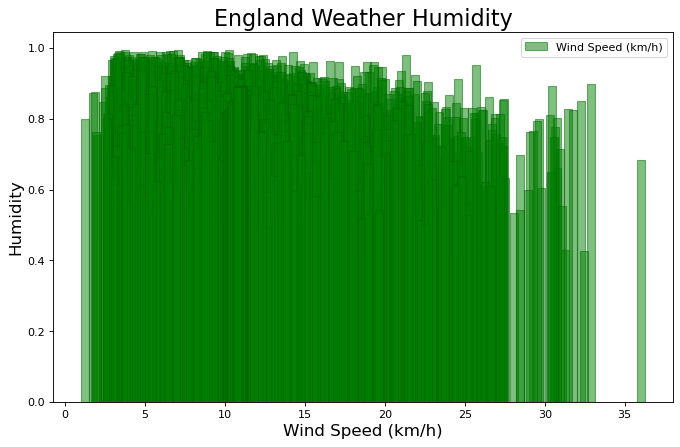

In [37]:
# PLOTTING DF2

plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.bar(DF['Wind Speed (km/h)'], DF['Humidity'], width=0.5, color="green", edgecolor="darkgreen", alpha=0.5)

plt.legend (['Wind Speed (km/h)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Wind Speed (km/h)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels 
plt.ylabel('Humidity', fontsize=15)

#plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Bar plots (NEW)/2-Wind_Speed&Humidity_bar.png')

plt.show()

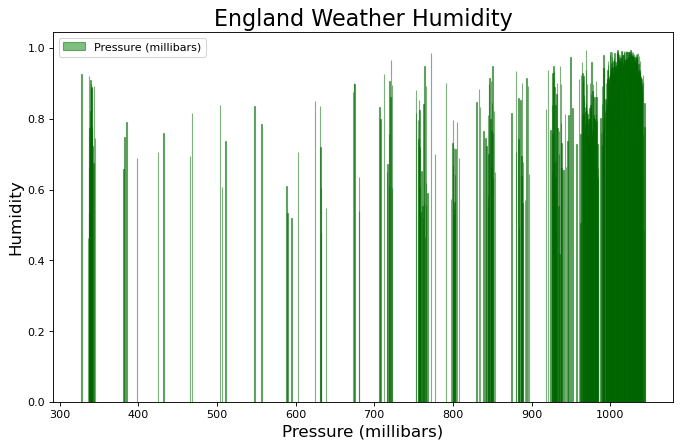

In [39]:
# PLOTTING DF3

plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.bar(DF['Pressure (millibars)'], DF['Humidity'], width=0.5, color="green", edgecolor="darkgreen", alpha=0.5)

plt.legend (['Pressure (millibars)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Pressure (millibars)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels 
plt.ylabel('Humidity', fontsize=15)

#plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Bar plots (NEW)/3-Pressure&Humidity_bar.png')

plt.show()

## Histogram Plots

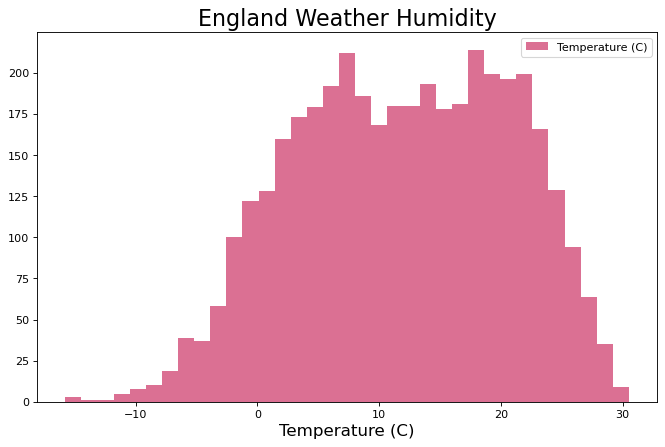

In [41]:
plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.hist(DF['Temperature (C)'], bins=35, color='palevioletred')

plt.legend (['Temperature (C)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Temperature (C)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Features histogram (NEW)/Temperature_hist.png')

#plt.grid()
plt.show()

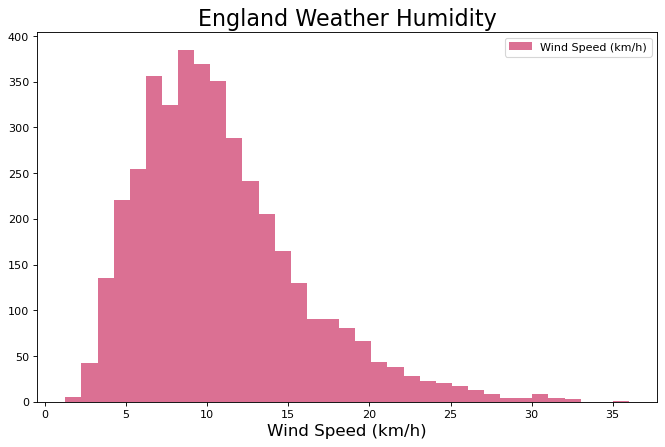

In [43]:
plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.hist(DF['Wind Speed (km/h)'], bins=35, color='palevioletred')

plt.legend (['Wind Speed (km/h)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Wind Speed (km/h)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Features histogram (NEW)/Wind_Speed_hist.png')

#plt.grid()
plt.show()

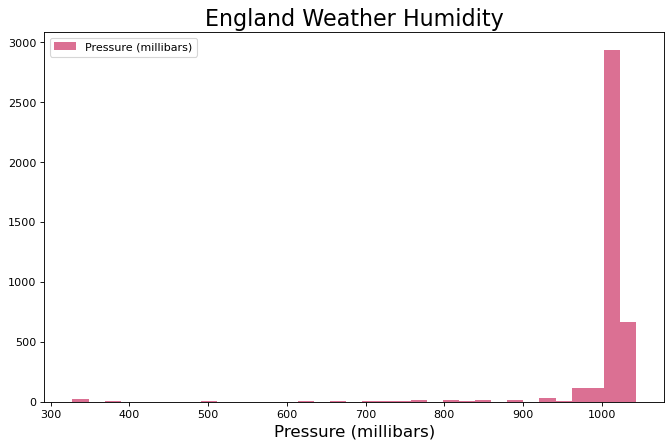

In [45]:
plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.hist(DF['Pressure (millibars)'], bins=35, color='palevioletred')

plt.legend (['Pressure (millibars)'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Pressure (millibars)', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Features histogram (NEW)/Pressure_hist.png')

#plt.grid()
plt.show()

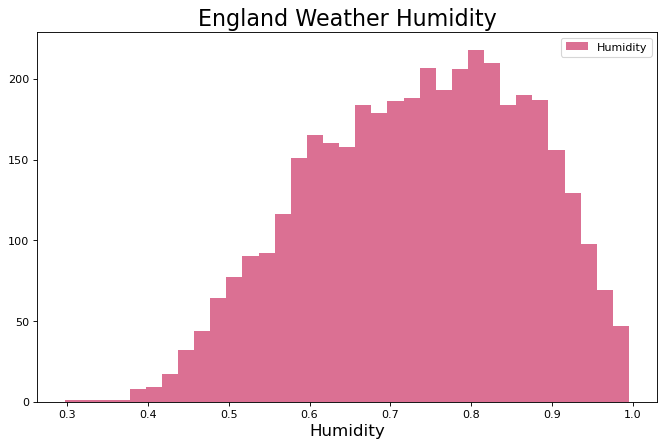

In [47]:
plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.hist(DF['Humidity'], bins=35, color='palevioletred')

plt.legend (['Humidity'], loc = 'best')
plt.title ("England Weather Humidity", fontsize=20)

plt.xlabel('Humidity', fontsize=15)
#plt.xticks(rotation=90) # Rotating the x labels

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/Features histogram (NEW)/Humidity_hist.png')

#plt.grid()
plt.show()

## Count Plots by Seaborn

Our DataFrame was:

In [48]:
DF

,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-01-01,3.873148,21.372750,1012.279167,0.818333
1,2006-01-02,5.418519,17.551683,1010.131667,0.844583
2,2006-01-03,2.319444,8.417617,1020.805000,0.898333
3,2006-01-04,2.274074,11.579925,981.826667,0.905417
4,2006-01-05,2.698148,9.515100,935.988333,0.948333
...,...,...,...,...,...
4013,2016-12-27,0.280324,10.980200,1020.304583,0.890000
4014,2016-12-28,0.224306,10.969467,1020.334583,0.890000
4015,2016-12-29,0.169676,10.892992,1020.365833,0.889583
4016,2016-12-30,0.119444,10.806454,1020.395000,0.889167


pandas.to_datetime() for time serie column is:

In [49]:
DF["Date"] = pd.to_datetime(DF["Date"])
DF["Date"]

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4013   2016-12-27
4014   2016-12-28
4015   2016-12-29
4016   2016-12-30
4017   2016-12-31
Name: Date, Length: 4018, dtype: datetime64[ns]

Now we want to use *Pandas* library to plot and analyze our first column which is a column with time series feature.<br>
We enter the column on which we want this analysis to take place.
Because we must first introduce the desired column to Python.<br>
We give this command a date format and here it is about the annual review.<br>
Of course, it can also be changed to a monthly review.

In [50]:
Year = pd.to_datetime(DF["Date"]).dt.year

Now is the time to run this command in Seaborn plotting:

In [51]:
import seaborn as sns

In this plot we only define the "X" axis, and no "Y".<br>
But why?<br>
Because this plot says:<br>
When you use this command, it counts the "y" by itselfs.<br>
It comes and counts y for us so there is no "y" needed.

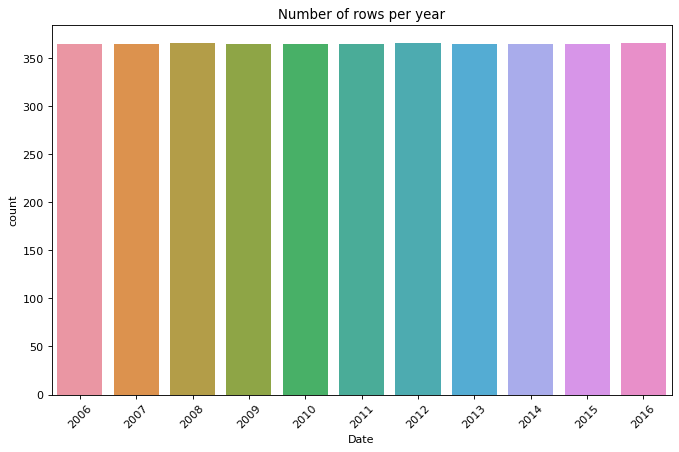

In [53]:
plt.figure(figsize=(10, 6), dpi=80) # Maximize the plot

plt.title('Number of rows per year')
plt.xticks(rotation=45) # Rotating the x labels

sns.countplot(x=Year)

#plt.savefig ('D:/IMT/3- Data Science/5- Project #1/plt.savefig/sns.countplot (NEW).png')

#plt.grid()
plt.show()